In [4]:
import shutil
shutil.unpack_archive('archive.zip', 'dataset-twitter', 'zip')

In [16]:
import pandas as pd
df_train = pd.read_csv('/content/dataset-twitter/twitter_training.csv')
df_valid = pd.read_csv('/content/dataset-twitter/twitter_validation.csv')

In [32]:
df_train.head()

,sentiment,content
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


fix the table and add columns name

In [ ]:
df_train.columns = ['drop1', 'drop2', 'sentiment', 'content']
df_valid.columns = ['drop1', 'drop2', 'sentiment', 'content']
df_train.drop(columns=['drop1', 'drop2'],inplace=True)
df_valid.drop(columns=['drop1', 'drop2'],inplace=True)

In [34]:
df_train.head()

,sentiment,content
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [85]:
#numerical operations
import numpy as np

#nlp
import nltk
from textblob import TextBlob
from nltk.tokenize import word_tokenize

#modelling
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

#visualization
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [24]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.8 MB/s eta 0:00:00


In [26]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [28]:
print('Shape: ', df_train.shape)
print('Column: ', df_train.columns)

Shape:  (74681, 4)
Column:  Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [59]:
def preprocess_text(text):
  if isinstance(text, float):
    return " "

  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '',text)
  text = text.strip()
  return text

In [60]:
df_train['content_c'] = df_train['content'].apply(preprocess_text)

In [68]:
df_train = df_train[['content_c', 'sentiment_label']]
df_train.head()

,content_c,sentiment_label
0,i am coming to the borders and i will kill you...,neutral
1,im getting on borderlands and i will kill you all,neutral
2,im coming on borderlands and i will murder you...,neutral
3,im getting on borderlands and i will murder y...,neutral
4,im getting into borderlands and i can murder y...,neutral


In [70]:
df_train.isnull()
total_null = df_train.isnull().sum().sum()
print('Null Data in DataFrame: ', total_null)

Null Data in DataFrame:  0


In [71]:
df_train.fillna('', inplace=True)

##Visualization

Analyzing sentiment distribution

In [72]:
def get_sentiment(text):
  return TextBlob(text).sentiment.polarity

In [77]:
df_train['sentiment'] = df_train['content_c'].apply(get_sentiment)
df_train['sentiment_label'] = df_train['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

In [78]:
df_train[['content_c', 'sentiment_label']]

,content_c,sentiment_label
0,i am coming to the borders and i will kill you...,neutral
1,im getting on borderlands and i will kill you all,neutral
2,im coming on borderlands and i will murder you...,neutral
3,im getting on borderlands and i will murder y...,neutral
4,im getting into borderlands and i can murder y...,neutral
...,...,...
74676,just realized that the windows partition of my...,negative
74677,just realized that my mac window partition is ...,negative
74678,just realized the windows partition of my mac ...,negative
74679,just realized between the windows partition of...,neutral


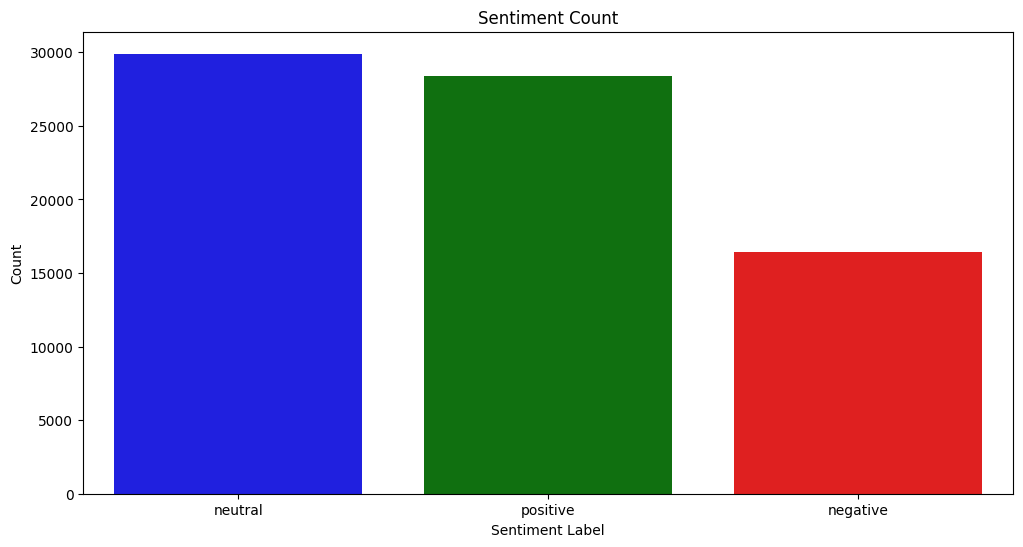

In [84]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='sentiment_label', palette={'negative': 'red', 'neutral': 'blue', 'positive': 'green'})
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Count')
plt.show()

In [91]:
stop_words = set(STOPWORDS)

In [94]:
negative_reviews = ' '.join(df_train[df_train['sentiment_label'] == 'negative']['content_c'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(negative_reviews)

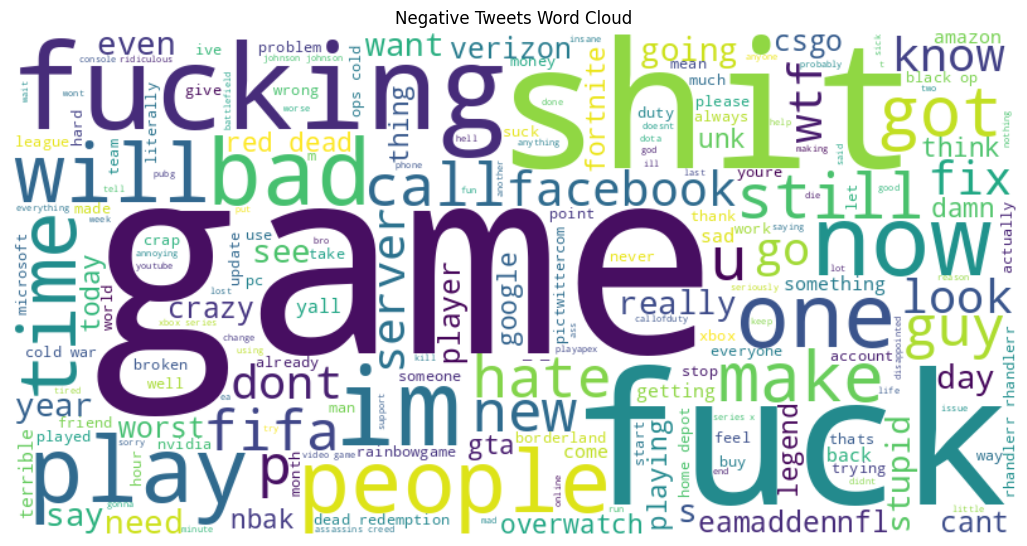

In [95]:
plt.figure(figsize=(13,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets Word Cloud')
plt.show()

##Preprocessing text

In [97]:
#preprocessing text data in content_c

def preprocessing_text(text):
  text = text.lower()
  text = re.sub(r'\W+', ' ', text)
  tokens = text.split()
  stop_words = set(STOPWORDS)
  filtered_tokens = [token for token in tokens if token not in stop_words]
  return filtered_tokens

In [99]:
texts = [preprocessing_text(text) for text in df_train[df_train['sentiment_label']=='negative']['content_c']]

In [100]:
texts[:7]

[['biggest',
  'dissappoinment',
  'life',
  'came',
  'year',
  'ago',
  'fuck',
  'borderlands'],
 ['biggest', 'disappointment', 'life', 'came', 'year', 'ago'],
 ['biggest', 'disappointment', 'life', 'came', 'year', 'ago'],
 ['biggest',
  'dissappoinment',
  'life',
  'coming',
  'year',
  'ago',
  'fuck',
  'borderlands'],
 ['biggest',
  'male',
  'dissappoinment',
  'life',
  'came',
  'hanging',
  'year',
  'time',
  'ago',
  'fuck',
  'borderlands'],
 ['blaming',
  'sight',
  'tardiness',
  'little',
  'bit',
  'borderlands',
  'got',
  'called',
  'early',
  'work',
  'tomorrow',
  'cant',
  'make',
  'time',
  'sorry',
  'loves',
  'twitchtvpunnisenpai'],
 ['guilty',
  'sobriety',
  'bit',
  'borderline',
  'called',
  'work',
  'early',
  'tomorrow',
  'cant',
  'catch']]

In [107]:
# make sure every items on texts is a string
texts = [str(text) for text in texts]

In [108]:
def preprocess_tweets(texts):
    tokenized_tweets = [simple_preprocess(text) for text in texts]
    tokenized_tweets = [[word for word in doc if word not in stop_words] for doc in tokenized_tweets]
    return tokenized_tweets

In [109]:
tokenized_tweets = preprocess_tweets(texts)

In [111]:
# create dict and corpus
dict = corpora.Dictionary(tokenized_tweets)
corpus =  [dict.doc2bow(tokens) for tokens in tokenized_tweets]

In [112]:
tokenized_tweets[0][:7]

['biggest', 'dissappoinment', 'life', 'came', 'year', 'ago', 'fuck']

## Building LDA Model

In [115]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dict, num_topics=5, passes=5, workers=2)

In [116]:
topics = lda_model.print_topics(-1)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

Topic 0: 0.032*"nvidia" + 0.012*"johnson" + 0.008*"will" + 0.007*"people" + 0.007*"amd" + 0.006*"ruthless" + 0.005*"intel" + 0.005*"mac" + 0.005*"now" + 0.004*"even"
Topic 1: 0.020*"fuck" + 0.012*"game" + 0.010*"im" + 0.009*"dont" + 0.008*"play" + 0.008*"rhandlerr" + 0.006*"now" + 0.006*"one" + 0.006*"please" + 0.006*"know"
Topic 2: 0.046*"game" + 0.023*"nvidia" + 0.010*"rtx" + 0.010*"shit" + 0.009*"fix" + 0.009*"now" + 0.008*"fucking" + 0.008*"make" + 0.008*"fuck" + 0.007*"cards"
Topic 3: 0.036*"nvidia" + 0.016*"shit" + 0.013*"fucking" + 0.011*"im" + 0.009*"crazy" + 0.008*"dead" + 0.008*"holy" + 0.008*"gpu" + 0.007*"red" + 0.005*"redemption"
Topic 4: 0.016*"bad" + 0.014*"wtf" + 0.012*"now" + 0.012*"nvidia" + 0.009*"shit" + 0.009*"cant" + 0.009*"people" + 0.007*"game" + 0.007*"hate" + 0.006*"go"


In [118]:
vis = gensimvis.prepare(lda_model, corpus, dict)
pyLDAvis.display(vis)